# Detect Periodicity in SARS-CoV-2 Incidence Values

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data from Vorpommern Greifswald
Downloaded on December 1st, 2020, from https://www.arcgis.com.  

column 1: number of cases  
column 2: date  (several rows per date common)  
column 3: number of days since case until December 1st, 2020  

In [3]:
C = pd.read_table("vpg-1Dez20.tbl", names = ["cases", "date", "days_since"], dtype = {"cases" : 'int', "days_since": 'int'})

In [4]:
n_max = max(C["days_since"])
n_max # days since first case

273

In [6]:
# add up the number of cases per day
a = np.zeros(n_max, dtype='int')
for row in C.itertuples():
    cases = row.cases
    days = row.days_since
    a[n_max-days] += cases

n = 35 # take the last 5 weeks only
a = a[-n:]
a

array([27, 33, 24, 20, 35,  9, 15, 42, 41, 30, 32, 31,  5, 14, 19, 30, 58,
       42, 14,  4, 10, 18, 52, 35, 33, 20,  2, 21, 22, 37, 23, 36, 36, 24,
        7])

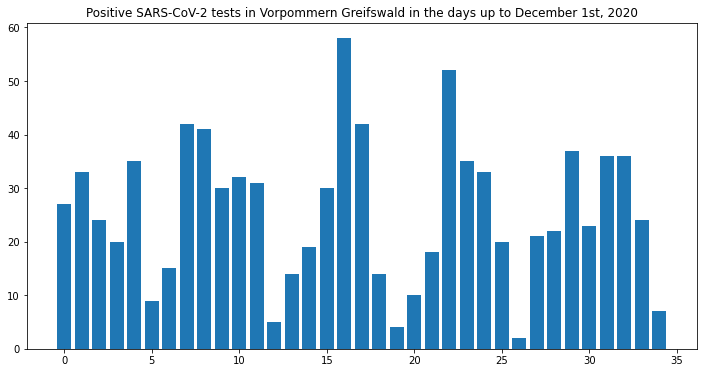

In [7]:
plt.subplots(figsize=(12,6))
plt.bar(range(len(a)), a);
plt.title("Positive SARS-CoV-2 tests in Vorpommern Greifswald in the days up to December 1st, 2020")
plt.savefig("sars-VG-1Dec20.pdf")

### Convolution
$$c_i:=\sum_{k\in\mathbb{Z}} a_k b_{i-k}\qquad (i=0,\ldots, n+m-2)$$

In [8]:
def convolve(a,b):
    """ Compute the convolution in time O(nm) """
    n = len(a)
    m = len(b)
    c = np.zeros(n + m - 1, dtype = 'int')
    for i in range(n):
        for j in range(m):
            c[i+j] += a[i] * b[j]
    return c

# Find Period
First normalize $a$ to zero-mean. Then compute the cross-correlation of $a$ with itself.

In [9]:
#a = a - np.mean(a).astype('int')

b = a_rev = np.flip(a) # reverse the order of one copy
print ("a reversed and normalized: ", a_rev)

a reversed and normalized:  [ 7 24 36 36 23 37 22 21  2 20 33 35 52 18 10  4 14 42 58 30 19 14  5 31
 32 30 41 42 15  9 35 20 24 33 27]


In [10]:
c = convolve(a, b) # = cross-correlation of a with itself
c

array([  189,   879,  1932,  2876,  3398,  4245,  4668,  4879,  4979,
        6298,  7399,  8549,  9848, 10352,  9572,  8584,  9572, 11092,
       14137, 15593, 15373, 14715, 13703, 13490, 14680, 17784, 19771,
       21937, 21204, 18507, 17198, 18266, 20666, 24884, 29363, 24884,
       20666, 18266, 17198, 18507, 21204, 21937, 19771, 17784, 14680,
       13490, 13703, 14715, 15373, 15593, 14137, 11092,  9572,  8584,
        9572, 10352,  9848,  8549,  7399,  6298,  4979,  4879,  4668,
        4245,  3398,  2876,  1932,   879,   189])

NameError: name 'mode' is not defined

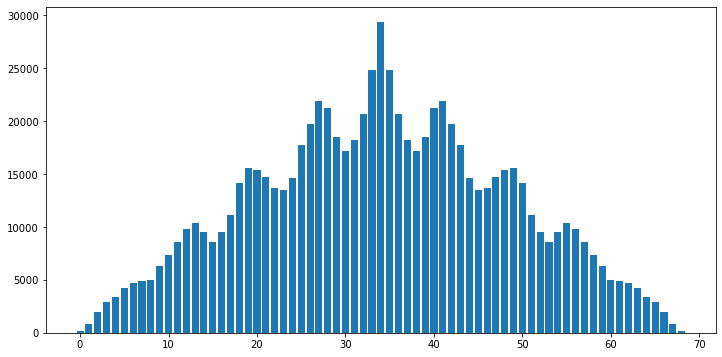

In [11]:
# plot c
plt.subplots(figsize = (12,6))
plt.bar(range(len(c)), c)
plt.title("cross correlation\nmode at " + str(mode))
plt.savefig("cross-corr.pdf")

## Correspondence between an entry $j$ in $c$ and a shift
$$c_i:=\sum_k a_k b_{i-k} = \sum_k a_k a_{n-1- (i-k)} =  \sum_k a_k a_{k + n-1 -i)} $$ 
Therefore, a peak at $i$ corresponds to a shift of $a$ relative to itself by $n-1-i$.

In [12]:
peaks = np.argsort(-c) # sort indices by decreasing value
periods = n - 1 - peaks
periods

array([  0,  -1,   1,  -7,   7,   6,  -6,  -2,   2,  -8,   8,  -5,   5,
        -3,   3,  -9,   9,   4,  -4, -15,  15, -14,  14, -13,  13, -10,
        10, -16,  16,  12, -12, -11,  11,  17, -17,  21, -21,  22, -22,
       -18, -20,  18,  20, -19,  19, -23,  23, -24,  24, -25,  25, -26,
        26, -27,  27, -28,  28,  29, -29, -30,  30, -31,  31, -32,  32,
        33, -33,  34, -34])

In [75]:
print ("Candidate for periodicity:", abs(periods[1]))

Candidate for periodicity: 7
